<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_8_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# case_7. sentiment


Sentiment analysis is a natural language processing task that involves determining the sentiment expressed in a piece of text. The sentiment can be positive, negative, or neutral. Sentiment analysis is commonly used to analyze customer reviews, social media content, and other textual data to understand the opinions or attitudes expressed.

## 5.1 sentiment analysis

In [ ]:
from textblob import TextBlob

# Get a sentence from the user
sentence = input('Please enter a sentence: ')

# Create a TextBlob object
blob = TextBlob(sentence)

# Determine the polarity and subjectivity of the sentence
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Print the results
print(f'The polarity of this sentence is {polarity}.')
print(f'The subjectivity of this sentence is {subjectivity}.')

Please enter a sentence: this is painful
The polarity of this sentence is -0.7.
The subjectivity of this sentence is 0.9.


## 5.2 valence aware dictionary and sentiment reasoner (VADER)

In [ ]:
! pip install nltk

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/liyao/nltk_data...


True

The *polarity_scores* method from the *SentimentIntensityAnalyzer* is to obtain sentiment scores for a given line of text. The polarity_scores method returns a dictionary containing the positive, negative, neutral, and compound scores for the input text. The compound score is often used to represent the overall sentiment of the text.

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(lyrics):
    sid = SentimentIntensityAnalyzer()

    # Split the lyrics into lines
    lines = lyrics.split('\n')

    # Analyze the sentiment of each line and aggregate the results
    total_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    for line in lines:
        if line:  # Ignore empty lines
            scores = sid.polarity_scores(line)
            for key in scores:
                total_scores[key] += scores[key]

    # Calculate average scores
    num_lines = len(lines)
    avg_scores = {key: total_scores[key] / num_lines for key in total_scores}

    sentiment = None
    if avg_scores['compound'] > 0:
        sentiment = 'Positive'
    elif avg_scores['compound'] < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, avg_scores

# Replace with your actual song lyrics
lyrics = """
Shadows are fallin' and I've been here all day
It's too hot to sleep and time is runnin' away
I feel like my soul has turned into steel
I've still got the scars that the sun didn't heal
There's not even room enough to be anywhere
It's not dark yet, but it's gettin' there
Well, my sense of humanity has gone down the drain
Behind every beautiful thing there's been some kind of pain
She wrote me a letter and she wrote it so kind
She put down in writin' what was in her mind
I just don't see why I should even care
It's not dark yet, but it's gettin' there
Well, I've been to London and I been to gay Paris
I've followed the river and I got to the sea
I've been down on the bottom of the world full of lies
I ain't lookin' for nothin' in anyone's eyes
Sometimes my burden is more than I can bear
It's not dark yet, but it's gettin' there
I was born here and I'll die here against my will
I know it looks like I'm movin' but I'm standin' still
Every nerve in my body is so naked and numb
I can't even remember what it was, I came here to get away from
Don't even hear the murmur of a prayer
It's not dark yet, but it's gettin' there
"""

sentiment, scores = analyze_sentiment(lyrics)

print(f"Sentiment: {sentiment}")
print(f"Scores: {scores}")

Sentiment: Positive
Scores: {'neg': 0.04838461538461539, 'neu': 0.8081153846153846, 'pos': 0.06657692307692308, 'compound': 0.018100000000000015}


## 5.3 bob dylan's saddest song

The following code does a sentiment analysis using TextBlob to analyze the lyrics of Bob Dylan's songs and identify the "saddest" one based on sentiment polarity. 

In [ ]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# You need to download the 'punkt' and 'stopwords' packages if you haven't done so already
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv('bob_dylan_songs.csv')  # replace with your csv file

# Create a function to clean the lyrics
def clean_lyrics(lyrics):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(lyrics)
    filtered_lyrics = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_lyrics)

# Apply cleaning function to lyrics
df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)

# Get the polarity of each song
df['polarity'] = df['cleaned_lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sort the dataframe by polarity
df = df.sort_values('polarity')

# The first song in the sorted dataframe is the 'saddest' one
saddest_song = df.iloc[0]

print("The saddest Bob Dylan's song according to sentiment analysis is: ", saddest_song['title'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The saddest Bob Dylan's song according to sentiment analysis is:  All the Tired Horses


The top 20 saddest songs:

In [ ]:
df.head(20)

,release_year,album,title,lyrics,cleaned_lyrics,polarity
126,1970,Self Portrait,All the Tired Horses,All the tired horses in the sun\n \n How'm I s...,All tired horses sun How 'm I supposed get rid...,-0.400000
269,1989,Oh Mercy,Everything Is Broken,"Broken lines, broken strings\n\nBroken threads...","Broken lines , broken strings Broken threads ,...",-0.366667
218,1980,Saved,Solid Rock,"Well, I’m hangin’ on to a solid rock\n\nMade b...","Well , I ’ hangin ’ solid rock Made foundation...",-0.300000
63,1965,Highway 61 Revisited,Queen Jane Approximately,When your mother sends back all your invitatio...,When mother sends back invitations And father ...,-0.278571
40,1964,The Times They Are A-Changin',Ballad of Hollis Brown,Hollis Brown\n \n He lived on the outside of t...,Hollis Brown He lived outside town Hollis Brow...,-0.264848
142,1974,Planet Waves,Dirge,I hate myself for lovin’ you and the weakness ...,I hate lovin ’ weakness showed You painted fac...,-0.226042
222,1981,Shot of Love,Trouble,"Trouble in the city, trouble in the farm\n\nYo...","Trouble city , trouble farm You got rabbit ’ f...",-0.202778
137,1973,"The Bootleg Series, Vol 1-3: Rare & Unreleased...",Call Letter Blues,"Well, I walked all night long\n\nListenin’ to ...","Well , I walked night long Listenin ’ church b...",-0.200000
78,1966,Blonde on Blonde,I Want You,The guilty undertaker sighs\n \n The lonesome ...,The guilty undertaker sighs The lonesome organ...,-0.200000
62,1965,Bringing It All Back Home,Mr. Tambourine Man,"Hey! Mr. Tambourine Man, play a song for me\n ...","Hey ! Mr. Tambourine Man , play song I ’ sleep...",-0.181366


## 5.4 emotion analysis

First, we create a pivot table where each row corresponds to a word, each column corresponds to an emotion. For example, the word abandon associates fear, negative, and sadness emotions.

In [13]:
import pandas as pd

filepath = 'data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt' # replace with the path to your lexicon file
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index() # this is like using pivot table in excel

In [17]:
emolex_df.head(10)

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0
5,abandonment,1,0,0,1,0,1,0,1,1,0
6,abate,0,0,0,0,0,0,0,0,0,0
7,abatement,0,0,0,0,0,0,0,0,0,0
8,abba,0,0,0,0,0,0,1,0,0,0
9,abbot,0,0,0,0,0,0,0,0,0,1


Then, we calculate the sum of emotion values for the words in the text.

In [18]:
def emotion_analyzer(text, df=emolex_df):
  words_to_check = []

  for word in text.split(' '):
        word = word.lower()
        words_to_check.append(word)

  filtered_df = df[df["word"].isin(words_to_check)]
  sum_of_values = filtered_df.sum(numeric_only=True)

  return sum_of_values

In [19]:
text = "I am happy and excited about this great opportunity!"
emotion_analyzer(text)

emotion
anger           0
anticipation    2
disgust         0
fear            0
joy             2
negative        0
positive        2
sadness         0
surprise        1
trust           2
dtype: int64

In [20]:
emotion_analyzer(lyrics)

emotion
anger           1
anticipation    3
disgust         0
fear            1
joy             4
negative        2
positive        7
sadness         3
surprise        1
trust           3
dtype: int64


In the following code, we create a function *plot_sentiment_arc* that reads a text file, tokenizes it into sentences, performs sentiment analysis on each sentence using TextBlob, and then plots the sentiment scores over the narrative arc. What can you conclude from the following plot?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


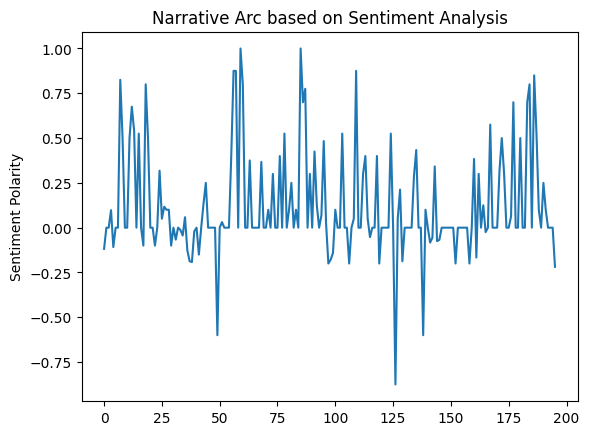

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
import nltk

nltk.download('punkt')

def plot_sentiment_arc(file_path):
    # Open and read the file
    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Run sentiment analysis on each sentence
    sentiment_scores = []
    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment_scores.append(blob.sentiment.polarity)

    # Plot the sentiment scores
    plt.plot(sentiment_scores)
    plt.title('Narrative Arc based on Sentiment Analysis')
    plt.ylabel('Sentiment Polarity')
    plt.show()

# Use the function on your text file
plot_sentiment_arc('snow_white.txt')